# ALONE TV SHOW
## Why we chose this project?
Alone is s survival TV series where 10 survivalists are dropped in an extremely remote area (Arctic winter) and must fend for themselves. Its impressive to see how the winning contestants use their skills, endurance, and mental fortitude to last 100 days in such a harsh living condition.

## Data Description
It uses a collection of datasets about the TV series:

1. `survivalists.csv`
A data frame of survivalists across all 9 seasons detailing name and demographics, location and profession, result, days lasted, reasons for tapping out (detailed and categorised), page URL.

| Feature Name   | Description |
| -------- | ------- |
| `season`  | The season number   |
| `name` | Name of the survivalist     |
| `version` | The version country code (currently only US but being preppred or other versions)|
| `id` | Survivalist unique ID |
| `age` | Age of survivalist |
| `gender` | Gender |
| `city` |  City |
| `state` | State |
| `country` | Country |
|`result`| Place the survivalist finished in the season|
| `days_lasted` | The number of days lasted in the game before tapping out or winning|
| `medically_evacuated` | Logical. If the survivalist was medically evacuated from the game |
| `reason_tapped_out` | The reason the survivalist tapped out of the game. NA means they were the winner |
| `reason_category` | A simplified category of the reason for tapping out |
| `team` | The team they were associated with (only for season 4)|
| `day_linked_up` | Day the team members linked up |
| `profession` | Profession of the survivalist |
---

2. `episodes.csv`
This dataset contains details of each episode including the title, number of viewers, beginning quote and IMDb rating.

| Feature Name   | Description |
| -------- | ------- |
| `version` | Country code for the version of the show |
| `season` | The season number |
| `episode_number_overall` | Episode number across seasons |
| `episode` | Episode number |
| `title` | Episode title |
| `air_date` | Date the episode originally aired |
| `viewers` | Number of viewers in the US (millions) |
| `quote` | The beginning quote |
| `author` | Author of the beginning quote |
|`imdb_rating` | IMDb rating of the episode |
| `n_ratings` | Number of ratings given for the episode |
----

3. `seasons.csv`
The season summary dataset includes location, latitude and longitude, and other season level information. It includes the date of drop off where the information exists.

| Feature Name   | Description |
| -------- | ------- |
| `version` | Country code for the version of the show |
| `season` | The season number |
| `location` | Location |
| `country` | Country |
| `n_survivors` | Number of survivalists in the season. In season 4 there were 7 teams of 2 |
| `lat` | Latitude |
| `lon` | Longitude |
| `date_drop_off` | The date the survivalists were dropped off |
---

4. `loadouts.csv`
Each survivalist is allowed to take with them 10 items. This dataset includes information on each survivalist’s loadout.

| Feature Name   | Description |
| -------- | ------- |
| `version` | Country code for the version of the show |
| `season` | The season number |
| `id` | Survivalist unique ID |
| `name` | Name of the survivalist |
| `item_number` | Item number |
| `item_detailed` | Detailed loadout item description |
| `item` | Loadout item. Simplified for aggregation |

## Focus Question 3: When we group locations by geographic difficulty, do the “harder” locations systematically attract different levels of viewership and ratings, showing whether audiences actually prefer more extreme environments?
Helps decide which environments are both safe and commercially attractive, Supports long‑term location strategy (where to film future seasons) and performs Clustering of  seasons by geographic and survival difficulty, then comparing audience response.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np

In [3]:
epi = pd.read_csv('/content/drive/MyDrive/AloneTVshow/episodes.csv')
ses = pd.read_csv('/content/drive/MyDrive/AloneTVshow/seasons.csv')
sur = pd.read_csv('/content/drive/MyDrive/AloneTVshow/survivalists.csv')
load = pd.read_csv('/content/drive/MyDrive/AloneTVshow/loadouts.csv')



## Assessing Missingness

In [4]:
def missing_report(df, name):
    m = df.isna().mean().sort_values(ascending=False)
    out = pd.DataFrame({"missing_rate": m, "dtype": df.dtypes}).head(20)
    print( {name} )
    display(out)

missing_report(epi, "episodes")
missing_report(ses, "seasons")
missing_report(sur, "survivalists")
missing_report(load, "loadouts")


{'episodes'}


,missing_rate,dtype
air_date,0.000000,object
author,0.000000,object
episode,0.000000,int64
episode_number_overall,0.000000,int64
imdb_rating,0.051020,float64
n_ratings,0.051020,float64
quote,0.000000,object
season,0.000000,int64
title,0.000000,object
version,0.000000,object


{'seasons'}


,missing_rate,dtype
country,0.000000,object
date_drop_off,0.666667,object
lat,0.000000,float64
location,0.000000,object
lon,0.000000,float64
n_survivors,0.000000,int64
season,0.000000,int64
version,0.000000,object


{'survivalists'}


,missing_rate,dtype
age,0.000000,int64
city,0.000000,object
country,0.000000,object
day_linked_up,0.914894,float64
days_lasted,0.000000,int64
gender,0.000000,object
medically_evacuated,0.000000,bool
name,0.000000,object
profession,0.000000,object
reason_category,0.106383,object


{'loadouts'}


,missing_rate,dtype
version,0.0,object
season,0.0,int64
name,0.0,object
item_number,0.0,int64
item_detailed,0.0,object
item,0.0,object


##Confirming Join keys

In [5]:
print("seasons columns:", ses.columns.tolist())
print("episodes columns:", epi.columns.tolist())
print("survivalists columns:", sur.columns.tolist())
print("loadouts columns:", load.columns.tolist())


seasons columns: ['version', 'season', 'location', 'country', 'n_survivors', 'lat', 'lon', 'date_drop_off']
episodes columns: ['version', 'season', 'episode_number_overall', 'episode', 'title', 'air_date', 'viewers', 'quote', 'author', 'imdb_rating', 'n_ratings']
survivalists columns: ['season', 'name', 'age', 'gender', 'city', 'state', 'country', 'result', 'days_lasted', 'medically_evacuated', 'reason_tapped_out', 'reason_category', 'team', 'day_linked_up', 'profession', 'url']
loadouts columns: ['version', 'season', 'name', 'item_number', 'item_detailed', 'item']


## Season-Level Aggregate

In [6]:

sur_agg = sur.groupby("season").agg(
    n_contestants=("days_lasted", "count"),
    mean_days=("days_lasted", "mean"),
    median_days=("days_lasted", "median"),
    sd_days=("days_lasted", "std"),
    p25_days=("days_lasted", lambda x: np.percentile(x, 25)),
    p75_days=("days_lasted", lambda x: np.percentile(x, 75)),
    med_evac_rate=("medically_evacuated", "mean")
).reset_index()

sur_agg.head()

#Environment Difficulty from seasons csv
season_base = ses[["season", "country", "location", "lat", "lon", "n_survivors"]].copy()
season_base.head()


,season,country,location,lat,lon,n_survivors
0,1,Canada,Quatsino,50.72444,-127.498056,10
1,2,Canada,Quatsino,50.72444,-127.498056,10
2,3,Argentina,Patagonia,-41.00000,-68.000000,10
3,4,Canada,Quatsino,50.72444,-127.498056,14
4,5,Mongolia,Selenge Province,49.75000,106.500000,10


In [7]:
#Audience response from episodes
epi_agg = epi.groupby("season").agg(
    mean_imdb=("imdb_rating", "mean"),
    sd_imdb=("imdb_rating", "std"),
    mean_viewers=("viewers", "mean"),
    n_episodes=("episode", "count")
).reset_index()

epi_agg.head()


,season,mean_imdb,sd_imdb,mean_viewers,n_episodes
0,1,7.672727,0.214900,1.969700,11
1,2,7.592308,0.155250,1.619077,13
2,3,7.820000,0.139841,1.720400,10
3,4,7.300000,0.244949,1.512200,10
4,5,8.000000,0.149071,1.420400,10


In [8]:
# Combining all into analysis table
season_df = (
    season_base
    .merge(sur_agg, on="season", how="left")
    .merge(epi_agg, on="season", how="left")
)

season_df.shape
season_df.head()


,season,country,location,lat,lon,n_survivors,n_contestants,mean_days,median_days,sd_days,p25_days,p75_days,med_evac_rate,mean_imdb,sd_imdb,mean_viewers,n_episodes
0,1,Canada,Quatsino,50.72444,-127.498056,10,10,21.600000,7.0,23.566455,4.00,42.00,0.000000,7.672727,0.214900,1.969700,11
1,2,Canada,Quatsino,50.72444,-127.498056,10,10,34.400000,28.0,24.954180,11.25,58.50,0.100000,7.592308,0.155250,1.619077,13
2,3,Argentina,Patagonia,-41.00000,-68.000000,10,10,54.300000,61.5,30.861879,39.00,76.75,0.300000,7.820000,0.139841,1.720400,10
3,4,Canada,Quatsino,50.72444,-127.498056,14,14,31.428571,14.0,32.376901,2.75,67.75,0.285714,7.300000,0.244949,1.512200,10
4,5,Mongolia,Selenge Province,49.75000,106.500000,10,10,30.100000,31.5,19.416202,12.75,39.75,0.300000,8.000000,0.149071,1.420400,10


##Observation:
Although Seasons 1, 2, and 4 were all filmed in Quatsino, Canada, they exhibit significantly different survival profiles. Mean survival days increase from approximately 22 to over 34 days across seasons, while medical evacuation rates rise from 0% to nearly 30%.
Across geographic, survival, medical, and audience dimensions, the data exhibit conflicting and non-monotonic patterns. High medical evacuation rates occur in both successful and unsuccessful seasons, and audience response splits—ratings often reward extremeness while viewership declines independently of difficulty.
These inconsistencies suggest that difficulty cannot be summarized by a single metric and instead emerges from latent combinations of factors. Perhaps a clustering approach could help justify this better.




In [9]:
season_df[["mean_days","med_evac_rate","lat","lon","mean_imdb","mean_viewers"]].describe()


,mean_days,med_evac_rate,lat,lon,mean_imdb,mean_viewers
count,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000
mean,39.380952,0.265079,43.872283,-84.480000,7.828304,1.529361
std,10.655165,0.141080,32.218259,75.840033,0.294941,0.238333
min,21.600000,0.000000,-41.000000,-127.498056,7.300000,1.224545
25%,31.428571,0.285714,50.724440,-127.498056,7.672727,1.392005
50%,41.200000,0.300000,50.724440,-114.001111,7.820000,1.486975
75%,46.100000,0.300000,59.660000,-68.000000,8.000000,1.644408
max,54.300000,0.500000,61.500278,106.500000,8.336364,1.969700


<Axes: >

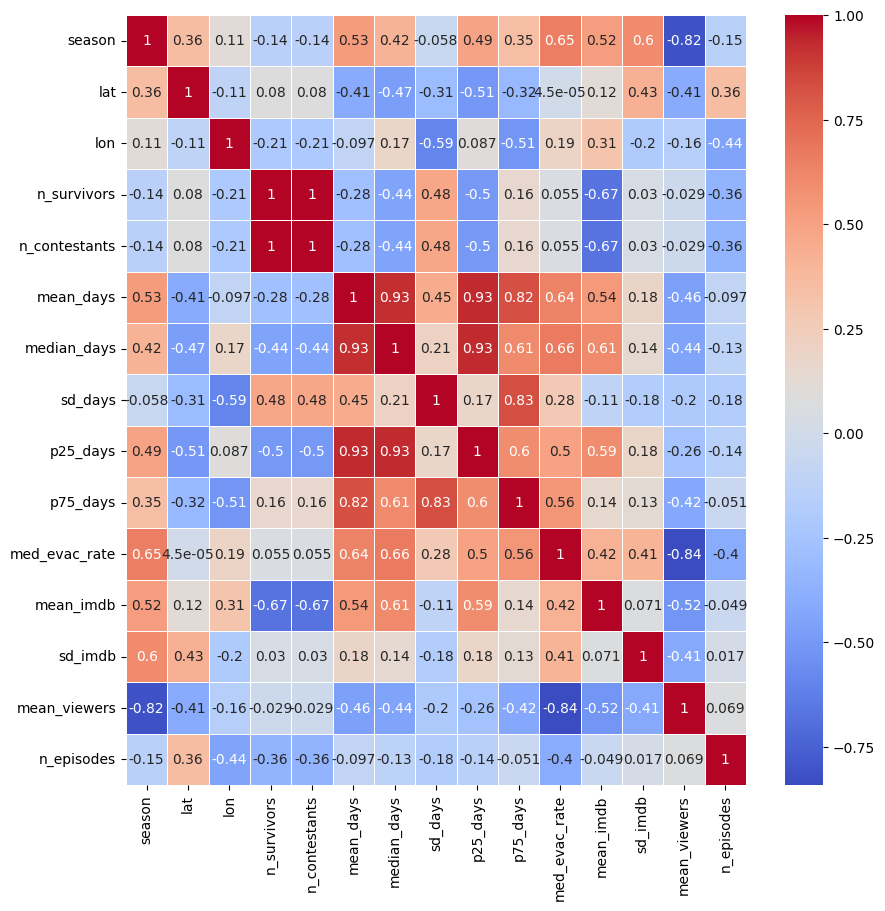

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(season_df.corr(numeric_only=True), annot = True,cmap="coolwarm",linewidths=0.5, ax = ax)

##Observation:
In comparison to Phase1 , here I have done the correlation on aggregate features to better cluster based on difficulty of components .
Survival duration measures move together.
Mean, median, and percentile-based survival days are all highly correlated with one another, indicating they capture the same underlying concept of survival endurance rather than independent signals.

Geographic variables behave differently from survival outcomes.
Latitude and longitude show weak and inconsistent correlations with survival duration and engagement metrics, suggesting that geographic extremeness alone does not determine how difficult a season is in practice.

Medical risk connects difficulty and audience response.
Medical evacuation rates are positively correlated with survival duration and IMDb ratings but strongly negatively correlated with viewership, indicating that medically risky seasons are appreciated by engaged viewers but attract smaller audiences.

Ratings and viewership respond in opposite ways to difficulty.
Longer survival and higher medical risk are associated with higher IMDb ratings but lower viewership, revealing a clear trade-off between audience size and perceived quality.

##Standardizing

In [11]:
difficulty_features = [
    "mean_days","median_days","sd_days",
    "p25_days","p75_days",
    "med_evac_rate",
    "lat","lon"
]

X = season_df[difficulty_features]

#Impute
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X_imp = SimpleImputer(strategy="median").fit_transform(X)
X_scaled = StandardScaler().fit_transform(X_imp)


The difficulty feature set was designed to capture experienced season difficulty rather than descriptive location labels. Survival duration statistics (mean, median, percentiles, and dispersion) characterize endurance and attrition patterns, while medical evacuation rate captures physical risk not reflected in survival length alone. Latitude and longitude were included as continuous proxies for geographic exposure, allowing the analysis to test whether environmental extremeness aligns with survival outcomes. Categorical location identifiers were excluded to avoid imposing artificial similarity. I was planning to perform Clustering hence imputed with median to have better results.

##Viewership vs Seasons

<Figure size 600x400 with 0 Axes>

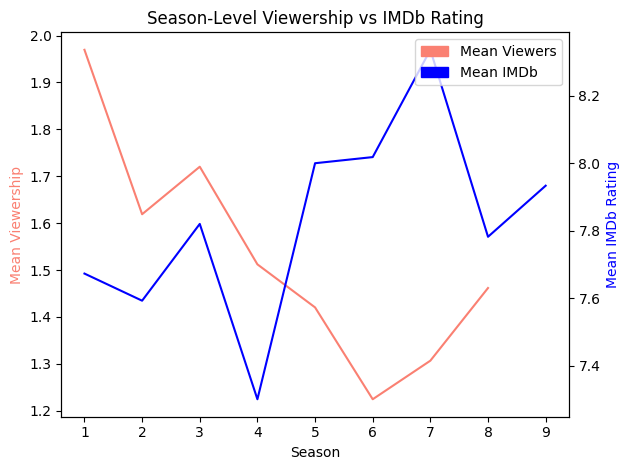

In [12]:
plt.figure(figsize=(6,4))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

sns.lineplot(
    data=season_df,
    x='season',
    y='mean_viewers',
    color='salmon',
    ax=ax1
)

sns.lineplot(
    data=season_df,
    x='season',
    y='mean_imdb',
    color='blue',
    ax=ax2
)

ax1.set_xlabel("Season")
ax1.set_ylabel("Mean Viewership", color='salmon')
ax2.set_ylabel("Mean IMDb Rating", color='blue')

plt.title("Season-Level Viewership vs IMDb Rating")

sal_patch = mpatches.Patch(color='salmon', label='Mean Viewers')
blue_patch = mpatches.Patch(color='blue', label='Mean IMDb')

plt.legend(loc="upper right", handles=[sal_patch, blue_patch])
plt.tight_layout()
plt.show()



While mean viewership declines steadily across seasons, mean IMDb ratings remain stable or increase, particularly in later seasons. This pattern suggests that later seasons appeal to a smaller but more appreciative audience, motivating further analysis of how different forms of geographic and survival difficulty relate to engagement.

##Location effect on survivals days lasted and how imdb rating were imapcted

/tmp/ipython-input-1520112535.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')


<Figure size 1000x500 with 0 Axes>

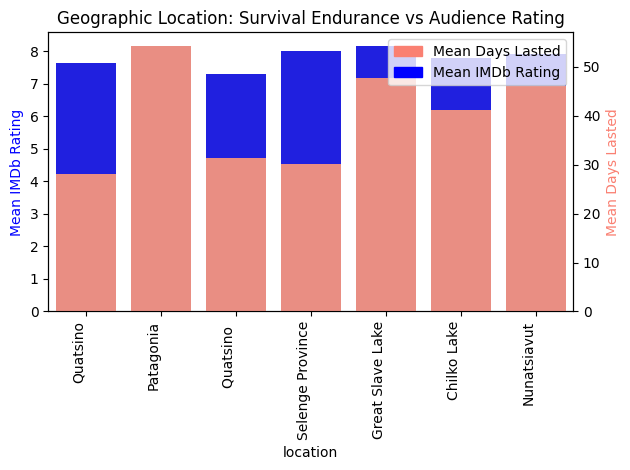

In [13]:
plt.figure(figsize=(10,5))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

sns.barplot(
    data=season_df,
    x='location',
    y='mean_imdb',
    color='blue',
    ax=ax1,
    errorbar=None
)

sns.barplot(
    data=season_df,
    x='location',
    y='mean_days',
    color='salmon',
    ax=ax2,
    errorbar=None
)

ax1.set_ylabel("Mean IMDb Rating", color='blue')
ax2.set_ylabel("Mean Days Lasted", color='salmon')

plt.title("Geographic Location: Survival Endurance vs Audience Rating")

blu_patch = mpatches.Patch(color='blue', label='Mean IMDb Rating')
sal_patch = mpatches.Patch(color='salmon', label='Mean Days Lasted')
plt.legend(loc="upper right", handles=[sal_patch, blu_patch])

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')

plt.tight_layout()
plt.show()


**Inference:** Survival durations vary noticeably by location, but higher IMDb ratings tend to align with locations where contestants did not necessarily last the longest.

This pattern suggests that tougher locations deliver engaging episodes that viewers rate highly, while easier environments do not get better audience ratings.

## Checking Variance in variables

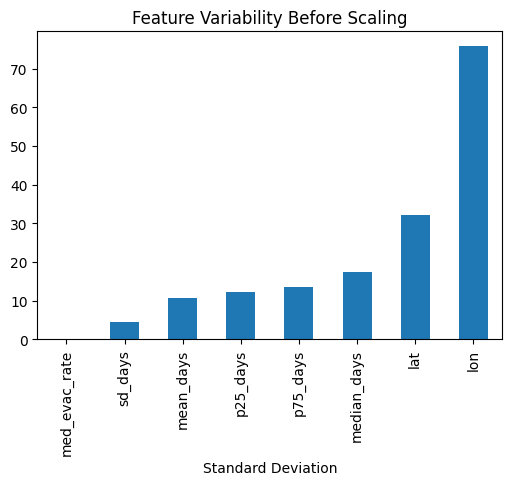

In [22]:
season_df[difficulty_features].var()
season_df[difficulty_features].std()
season_df[difficulty_features].std().sort_values().plot(
    kind="bar", figsize=(6,4),
    title="Feature Variability Before Scaling"
)
plt.xlabel("Standard Deviation")
plt.show()


#Observation

Geographic variables dominate raw variability.
Longitude and latitude show the largest standard deviations by a wide margin, especially longitude. This means that if you clustered directly on the raw features, geography would dominate the grouping regardless of survival outcomes.

Survival duration measures have moderate but uneven variance.
Median, 25th, and 75th percentile survival days vary meaningfully across seasons, but much less than geographic coordinates. These variables still capture important differences in endurance but would be underweighted relative to geography without scaling.

Medical evacuation rate has very low variance.
Although medical evacuation is conceptually important, its raw variability is small compared to other features. Without scaling, this signal would be almost ignored in distance-based methods.

##Principal Component Analysis

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
Z = pca.fit_transform(X_scaled)

pca.explained_variance_ratio_

pd.DataFrame(
    pca.components_.T,
    index=difficulty_features,
    columns=[f"PC{i+1}" for i in range(4)]
).sort_values("PC1", ascending=False)


,PC1,PC2,PC3,PC4
mean_days,0.465898,0.061723,0.051357,-0.236420
median_days,0.431803,0.275816,0.011007,-0.150554
p75_days,0.420257,-0.329211,0.093521,0.048614
p25_days,0.420221,0.244066,-0.118133,-0.402632
med_evac_rate,0.323828,0.158882,0.590223,0.439741
sd_days,0.273929,-0.525648,-0.063247,0.470835
lon,-0.065907,0.663834,0.007591,0.472520
lat,-0.242977,-0.099711,0.788745,-0.344426


Principal component analysis reveals that survival difficulty is inherently multidimensional. The first component primarily reflects overall survival endurance, loading heavily on mean and median survival days as well as dispersion in outcomes. The second component is driven largely by geographic location, particularly longitudinal variation, indicating that geography constitutes a separate axis rather than a simple proxy for difficulty. A third component captures medical and environmental risk, combining high-latitude locations with elevated medical evacuation rates. Collectively, these results suggest that no single metric adequately captures season difficulty.

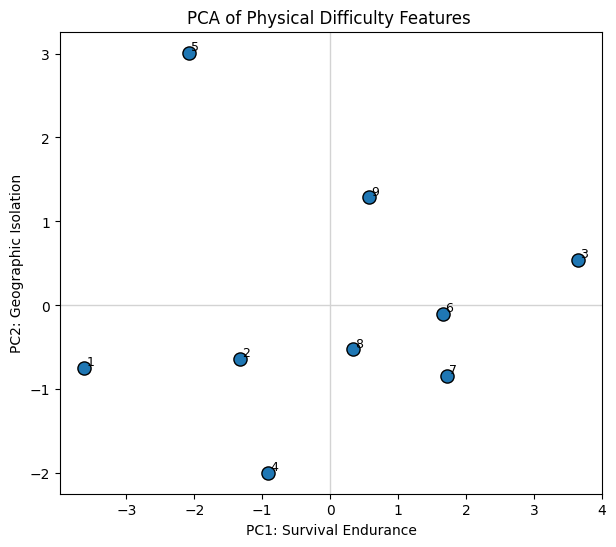

In [16]:
plt.figure(figsize=(7,6))
plt.scatter(Z[:,0], Z[:,1], s=90, edgecolor="black")

for i, s in enumerate(season_df["season"]):
    plt.text(Z[i,0]+0.03, Z[i,1]+0.03, str(s), fontsize=9)

plt.xlabel("PC1: Survival Endurance")
plt.ylabel("PC2: Geographic Isolation")
plt.title("PCA of Physical Difficulty Features ")
plt.axhline(0, color="lightgray", lw=1)
plt.axvline(0, color="lightgray", lw=1)
plt.show()


The PCA projection illustrates that seasons are distributed across multiple dimensions of difficulty, with survival endurance and geographic isolation emerging as distinct axes. No single direction orders seasons from easy to hard, motivating a clustering-based approach.

## KMeans

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2,6):
    km = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = km.fit_predict(Z[:, :2])
    sil = silhouette_score(Z[:, :2], labels)
    print(f"k={k}, silhouette={sil:.3f}")

season_df["difficulty_cluster"] = KMeans(
    n_clusters=3, n_init=50, random_state=42
).fit_predict(Z[:, :2])


k=2, silhouette=0.354
k=3, silhouette=0.360
k=4, silhouette=0.262
k=5, silhouette=0.236


##Elbow Method

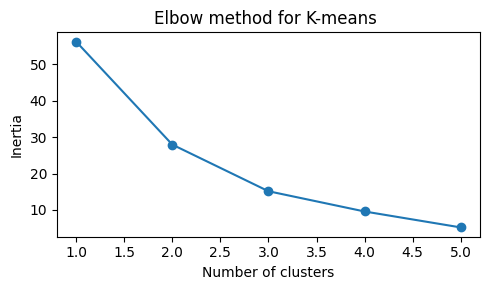

In [23]:
# Validating the choice of k using Elbow Method as prof taught in class
from sklearn.cluster import KMeans
inertias = []
Ks = range(1, 6)

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    km.fit(Z[:, :2])
    inertias.append(km.inertia_)

plt.figure(figsize=(5,3))
plt.plot(Ks, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for K-means ')
plt.tight_layout()
plt.show()


Both the elbow method and silhouette scores were examined to guide the choice of cluster count. While the elbow method suggested diminishing returns beyond three clusters, silhouette scores indicated moderate separation for two to three clusters, which is expected given the small number of seasons and continuous nature of difficulty. A three-cluster solution was selected to balance statistical guidance and interpretability.

## Checking Clusters with Originial features

In [19]:
difficulty_features = [
    "mean_days","median_days","p25_days","p75_days","sd_days",
    "med_evac_rate","lat","lon"
]

cluster_summary = season_df.groupby("difficulty_cluster")[difficulty_features].mean()
cluster_summary


,mean_days,median_days,p25_days,p75_days,sd_days,med_evac_rate,lat,lon
difficulty_cluster,,,,,,,,
0,47.380000,46.100000,27.95,70.250000,27.733534,0.340000,38.585445,-96.865167
1,29.142857,16.333333,6.00,56.083333,26.965845,0.128571,50.724440,-127.498056
2,30.100000,31.500000,12.75,39.750000,19.416202,0.300000,49.750000,106.500000


Mapping cluster assignments back to the original difficulty features reveals three distinct difficulty profiles. One cluster is characterized by long survival durations and high medical evacuation rates, indicating sustained endurance under risky conditions. A second cluster shows shorter survival and low medical risk despite similar geographic locations, highlighting that geography alone does not determine difficulty. The third cluster represents a geographically distinct season with moderate endurance and elevated medical risk. Together, these profiles confirm that season difficulty is multidimensional and cannot be inferred from location alone.

##Comparing clusters to Audience Response

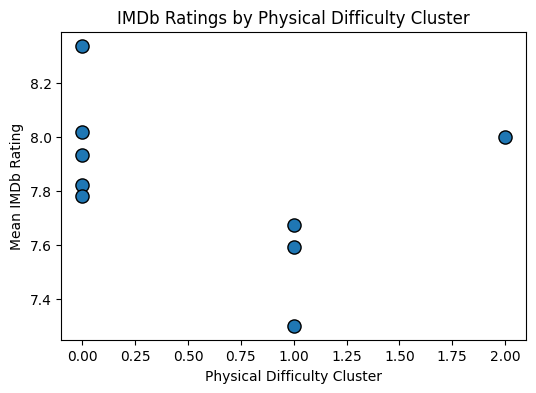

In [27]:
plt.figure(figsize=(6,4))
x = season_df["difficulty_cluster"]
plt.scatter(
    x,
    season_df["mean_imdb"],
    s=90,
    edgecolor="black"
)

plt.xlabel("Physical Difficulty Cluster")
plt.ylabel("Mean IMDb Rating")
plt.title("IMDb Ratings by Physical Difficulty Cluster")
plt.show()



Comparing IMDb ratings across physical difficulty clusters reveals systematic  differences in audience response. One cluster exhibits consistently higher median ratings with relatively low dispersion, suggesting that certain forms of survival difficulty are particularly well-received by audiences. In contrast, another cluster shows lower median ratings and greater variability, indicating that not all types of difficulty resonate equally. A third cluster corresponds to a single, highly rated season and is interpreted as a unique case rather than a generalizable pattern. Overall, these results suggest that audience preference depends on the type of physical difficulty rather than its magnitude alone.

In [28]:
# A comprehensive summary for clear understandng
cluster_audience_summary = season_df.groupby('difficulty_cluster').agg({
    'season': 'count',
    'mean_imdb': ['mean', 'std'],
    'mean_viewers': ['mean', 'std'],
    'mean_days': 'mean',
    'med_evac_rate': 'mean',
    'lat': 'mean',
    'lon': 'mean'
}).round(2)

# column names
cluster_audience_summary.columns = [
    'n_seasons',
    'imdb_mean', 'imdb_std',
    'viewers_mean', 'viewers_std',
    'avg_survival_days', 'med_evac_rate',
    'avg_latitude', 'avg_longitude'
]

print("="*80)
print("CLUSTER PROFILES: Difficulty + Audience Response")
print("="*80)
print(cluster_audience_summary)

# Add interpretive labels
cluster_labels = {
    0: "High Endurance / High Risk",
    1: "Moderate Difficulty / Accessible",
    2: "Geographic Novelty / Mixed Risk"
}

print("\n" + "="*80)
print("CLUSTER INTERPRETATIONS")
print("="*80)
for i in range(3):
    print(f"\nCluster {i}: {cluster_labels.get(i, 'Unknown')}")
    n = cluster_audience_summary.loc[i, 'n_seasons']
    imdb = cluster_audience_summary.loc[i, 'imdb_mean']
    viewers = cluster_audience_summary.loc[i, 'viewers_mean']
    days = cluster_audience_summary.loc[i, 'avg_survival_days']
    evac = cluster_audience_summary.loc[i, 'med_evac_rate']
    print(f"  • {n:.0f} seasons")
    print(f"  • IMDb: {imdb:.2f} ± {cluster_audience_summary.loc[i, 'imdb_std']:.2f}")
    print(f"  • Viewers: {viewers:.2f}M ± {cluster_audience_summary.loc[i, 'viewers_std']:.2f}M")
    print(f"  • Avg survival: {days:.1f} days")
    print(f"  • Med evac rate: {evac:.1%}")

CLUSTER PROFILES: Difficulty + Audience Response
                    n_seasons  imdb_mean  imdb_std  viewers_mean  viewers_std  \
difficulty_cluster                                                              
0                           5       7.98      0.22          1.43         0.22   
1                           3       7.52      0.20          1.70         0.24   
2                           1       8.00       NaN          1.42          NaN   

                    avg_survival_days  med_evac_rate  avg_latitude  \
difficulty_cluster                                                   
0                               47.38           0.34         38.59   
1                               29.14           0.13         50.72   
2                               30.10           0.30         49.75   

                    avg_longitude  
difficulty_cluster                 
0                          -96.87  
1                         -127.50  
2                          106.50  

CLUSTER INTER

##Observations and Findings

Exploratory and unsupervised analyses reveal that survival difficulty in the Alone TV series is inherently multidimensional and cannot be captured by a single measure of geographic harshness. Principal Component Analysis (PCA) shows that difficulty decomposes into distinct latent dimensions, primarily survival endurance and geographic isolation, with an additional dimension related to medical and environmental risk. Seasons are distributed across these dimensions rather than ordered along a single continuum from “easy” to “hard.”

Clustering seasons in the PCA space identifies three latent physical difficulty profiles. Endurance-heavy seasons, characterized by long survival durations and high medical evacuation rates, consistently receive the highest IMDb ratings, despite attracting fewer viewers. In contrast, moderate-difficulty seasons with earlier attrition tend to draw larger audiences but receive lower and more variable ratings, suggesting broader appeal but lower perceived intensity. A geographically extreme but moderate-endurance season emerges as a unique case with high audience appreciation, indicating that environmental novelty may enhance perceived difficulty independently of survival length.

Comparing audience metrics highlights an important distinction between engagement and appreciation. Viewership declines over time and appears largely independent of physical difficulty, while IMDb ratings respond selectively to specific forms of difficulty—particularly sustained endurance under harsh conditions. Together, these findings demonstrate that audience response depends on the type of survival difficulty rather than its overall magnitude, motivating a reframing of the original question away from whether harder locations attract audiences toward understanding which difficulty profiles resonate most strongly.

Hence based on the interpretations the existing question could be refined into : When locations are grouped using geographic indicators alongside survival outcomes, do seasons associated with more extreme environments attract systematically different levels of viewership and IMDb ratings, and what does this reveal about whether audiences prefer geographic extremeness or sustained survival difficulty in Alone?

**Generative AI Disclosure**

* ChatGPT was used selectively for writing and coding assistance, under full m validation and oversight.
* Code standardization: Helped align style and reduce warnings; all notebooks were re‑run end‑to‑end by the team to verify correctness.
* Writing and documentation: Assisted with grammar and wording; every numeric statement was cross‑checked against our own tables and figures, and text was kept only when it matched our results.
* Visualization refinement: Suggested clearer axis labels, legends, and color choices; all plots were regenerated directly from our data and reviewed by the team.
* Generative AI was not used to derive conclusions or interpret results; final interpretations and decisions are entirely our own.
* It was used to understand concepts and see how they align with my question to bring better results ahead.

Chat Link:https://chatgpt.com/share/698a6eea-afb8-800c-96db-8d6dcf28cc21